In [146]:
import time                 
import warnings              

import numpy as np            
import pandas as pd            
import matplotlib.pyplot as plt                  
import seaborn as sns
#import plotly.plotly as py 
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture

import os                    
import sys

In [147]:
clus_2016 = pd.read_csv("https://raw.githubusercontent.com/abhinav12347/stat-517/master/2016_final.csv")

In [148]:
clus_2016.head()

,Unnamed: 0,X,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1,1,32,A,20180101,300,106401,Nick Kyrgios,1,193,...,5,8,3,58,32,22,12,9,4,7
1,2,2,32,A,20180101,299,106401,Nick Kyrgios,1,193,...,2,5,6,74,44,32,16,13,3,6
2,3,3,32,A,20180101,298,105992,Ryan Harrison,1,183,...,6,9,5,94,62,49,16,16,0,3
3,4,4,32,A,20180101,297,105777,Grigor Dimitrov,1,188,...,2,6,1,89,53,39,23,15,4,6
4,5,5,32,A,20180101,296,106401,Nick Kyrgios,1,193,...,3,6,3,75,41,33,16,13,2,4


In [149]:
clus_2016.describe()

,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,7348.000000,7348.000000,7348.000000,7.348000e+03,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,...,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000,7348.000000
mean,3674.500000,3674.500000,61.441481,2.017121e+07,239.564371,107294.542052,0.866222,186.204001,27.923443,1730.118672,...,5.034023,5.473734,3.474823,82.920659,49.915079,33.647659,15.275585,11.362956,4.819134,8.612412
std,2121.329222,2121.329222,42.826799,7.781400e+03,81.521437,9985.456293,0.384733,7.006649,4.450412,2145.109956,...,4.017410,5.193518,2.509173,29.928058,19.715118,14.793110,7.351126,5.113107,3.332421,4.222448
min,1.000000,1.000000,4.000000,2.016010e+07,1.000000,100644.000000,0.000000,163.000000,14.926762,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1837.750000,1837.750000,32.000000,2.016072e+07,215.000000,104660.000000,1.000000,185.000000,24.936345,647.000000,...,2.000000,2.000000,2.000000,60.000000,36.000000,23.000000,10.000000,9.000000,2.000000,6.000000
50%,3674.500000,3674.500000,32.000000,2.017063e+07,277.000000,105227.000000,1.000000,185.000000,28.268309,983.500000,...,4.000000,4.000000,3.000000,78.000000,47.000000,31.000000,14.000000,11.000000,4.000000,8.000000
75%,5511.250000,5511.250000,128.000000,2.018023e+07,289.000000,106000.000000,1.000000,188.000000,31.112936,1935.000000,...,7.000000,7.000000,5.000000,99.000000,60.000000,41.000000,20.000000,14.000000,7.000000,11.000000
max,7348.000000,7348.000000,128.000000,2.018092e+07,701.000000,208029.000000,2.000000,208.000000,39.378508,16950.000000,...,25.000000,61.000000,18.000000,291.000000,218.000000,171.000000,54.000000,50.000000,25.000000,30.000000


In [150]:
print("Dimension of Dataset:", clus_2016.dtypes)

Dimension of Dataset: Unnamed: 0              int64
X                       int64
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_name            object
winner_hand             int64
winner_ht               int64
winner_ioc             object
winner_age            float64
winner_rank_points      int64
loser_id                int64
loser_name             object
loser_hand             object
loser_ht                int64
loser_ioc              object
loser_age             float64
loser_rank_points       int64
best_of                 int64
round                  object
minutes                 int64
w_ace                   int64
w_df                    int64
w_svpt                  int64
w_1stIn                 int64
w_1stWon                int64
w_2ndWon                int64
w_SvGms                 int64
w_bpSaved               int64
w_bpFaced               int64
l_ace             

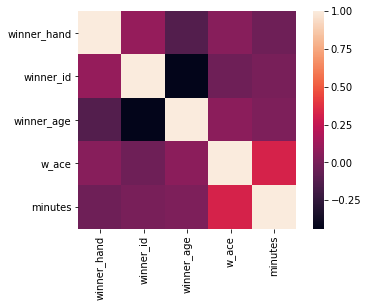

In [151]:
clus_2016_1 = clus_2016[['winner_hand','winner_id','winner_name' ,'winner_ioc', 'winner_age', 'w_ace','minutes' ]]
cor = clus_2016_1.corr()
sns.heatmap(cor, square = True)

In [152]:
clus_2016_new = pd.get_dummies(clus_2016, columns=["tourney_level", "winner_name", "winner_ioc", "loser_name", "loser_hand", "loser_ioc", "round"])
print (clus_2016_new.shape)
clus_2016_new.head()

(7348, 1196)


,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,loser_ioc_VIE,loser_ioc_ZIM,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1,1,32,20180101,300,106401,1,193,22.683094,2010,...,0,0,1,0,0,0,0,0,0,0
1,2,2,32,20180101,299,106401,1,193,22.683094,2010,...,0,0,0,0,0,0,0,0,0,1
2,3,3,32,20180101,298,105992,1,183,25.653662,1010,...,0,0,0,0,0,0,0,0,0,1
3,4,4,32,20180101,297,105777,1,188,26.631075,5150,...,0,0,0,1,0,0,0,0,0,0
4,5,5,32,20180101,296,106401,1,193,22.683094,2010,...,0,0,0,1,0,0,0,0,0,0


In [153]:
overwrite = {"loser_hand": {"R": 1}, "loser_hand":{"L": 0}, "loser_hand":{"U":0}, "winner_hand":{2:0}}
clus_2016_new.replace(overwrite, inplace = True)
clus_2016_new.head()

,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,loser_ioc_VIE,loser_ioc_ZIM,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1,1,32,20180101,300,106401,1,193,22.683094,2010,...,0,0,1,0,0,0,0,0,0,0
1,2,2,32,20180101,299,106401,1,193,22.683094,2010,...,0,0,0,0,0,0,0,0,0,1
2,3,3,32,20180101,298,105992,1,183,25.653662,1010,...,0,0,0,0,0,0,0,0,0,1
3,4,4,32,20180101,297,105777,1,188,26.631075,5150,...,0,0,0,1,0,0,0,0,0,0
4,5,5,32,20180101,296,106401,1,193,22.683094,2010,...,0,0,0,1,0,0,0,0,0,0


In [154]:
ss = StandardScaler()
ss.fit_transform(clus_2016_new)

array([[-1.73181511, -1.73181511, -0.6875014 , ..., -0.41170987,
        -0.26963073, -0.22094185],
       [-1.73134367, -1.73134367, -0.6875014 , ..., -0.41170987,
        -0.26963073,  4.52607779],
       [-1.73087224, -1.73087224, -0.6875014 , ..., -0.41170987,
        -0.26963073,  4.52607779],
       ...,
       [ 1.73087224,  1.73087224, -0.6875014 , ..., -0.41170987,
        -0.26963073, -0.22094185],
       [ 1.73134367,  1.73134367, -0.6875014 , ..., -0.41170987,
        -0.26963073, -0.22094185],
       [ 1.73181511,  1.73181511,  0.05974515, ...,  2.42889492,
        -0.26963073, -0.22094185]])

In [155]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(clus_2016_new, 2)
kmeans = pd.DataFrame(clust_labels)
clus_2016_new.insert((clus_2016_new.shape[1]),'kmeans',kmeans)

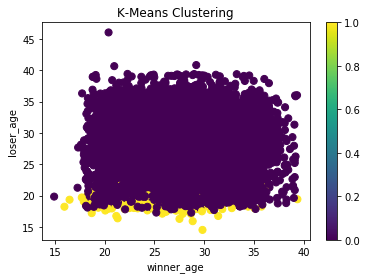

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(clus_2016_new['winner_age'],clus_2016_new['loser_age'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('winner_age')
ax.set_ylabel('loser_age')
plt.colorbar(scatter)

In [157]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(clus_2016_new, 2)
agglomerative = pd.DataFrame(clust_labels1)
clus_2016_new.insert((clus_2016_new.shape[1]),'agglomerative',agglomerative)

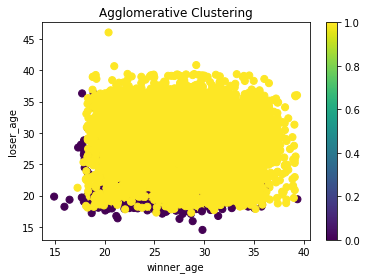

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(clus_2016_new['winner_age'],clus_2016_new['loser_age'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('winner_age')
ax.set_ylabel('loser_age')
plt.colorbar(scatter)

In [160]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(clus_2016_new)
affinity = pd.DataFrame(clust_labels2)
clus_2016_new.insert((clus_2016_new.shape[1]),'affinity',affinity)

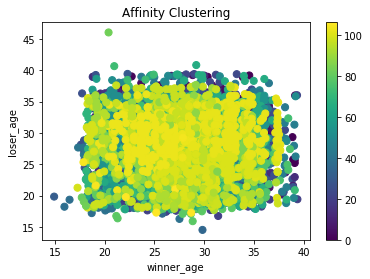

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(clus_2016_new['winner_age'],clus_2016_new['loser_age'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('winner_age')
ax.set_ylabel('loser_age')
plt.colorbar(scatter)